In [1]:
# In Anaconda, you must pip install ipympl and some widgit-related packages before using this motebook, 
# see https://cs.uwaterloo.ca/~yboykov/Courses/cs484/libraries.html
# In Google Colab, uncomment three lines of code below 
# from google.colab import output
# output.enable_custom_widget_manager()
# !pip install ipympl

In [2]:
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt

%matplotlib widget
        # NOTE:
        # Equivalently, one can call "%matplotlib ipympl" instead of "%matplotlib widget" to activate ipympl backend for interactive plotting 
        # This alternative for the default "inline" backend requires "ipympl" package, see https://matplotlib.org/ipympl/installing.html)
        # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details

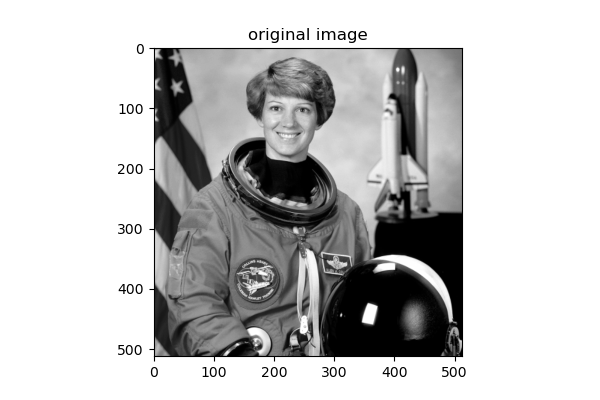

In [3]:
from skimage import data
from skimage.color import rgb2gray

#im = data.hubble_deep_field()[0:500, 0:500]
#im = image.imread("../images/IMG_3306.jpg")
im = data.astronaut()
#im = data.camera()

im_gray = rgb2gray(im)
#im_gray = im

plt.figure(1,figsize = (6, 4))
plt.imshow(im_gray, cmap = "gray")
plt.title("original image")

plt.show()

# "Blob" features - DOG at different scales ($\sigma$) 

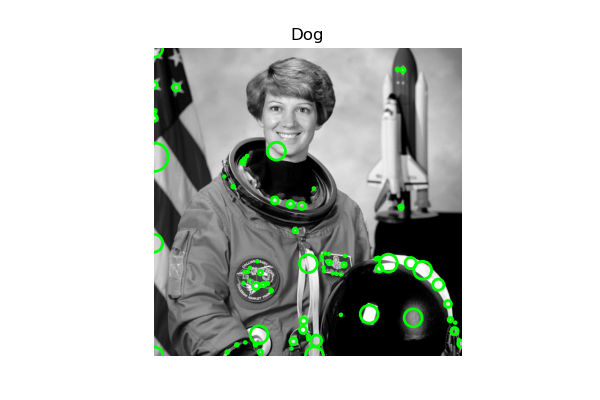

In [4]:
from math import sqrt
from skimage.feature import blob_dog, blob_log

blobs = blob_dog(im_gray, min_sigma=1, max_sigma=20, threshold=0.2, overlap=0.2)
blobs[:,2] = sqrt(2) * blobs[:,2]   #converting sigmas/scales to radii

fig = plt.figure(2,figsize = (6, 4))
ax = fig.add_subplot(111)
ax.set_title("Dog")
ax.imshow(im_gray, cmap = "gray")
for blob in blobs:
    y, x, r = blob
    ax.add_patch(plt.Circle((x, y), r, color="lime", linewidth=2, fill=False))
ax.set_axis_off()
    
plt.show()

# Harris corners

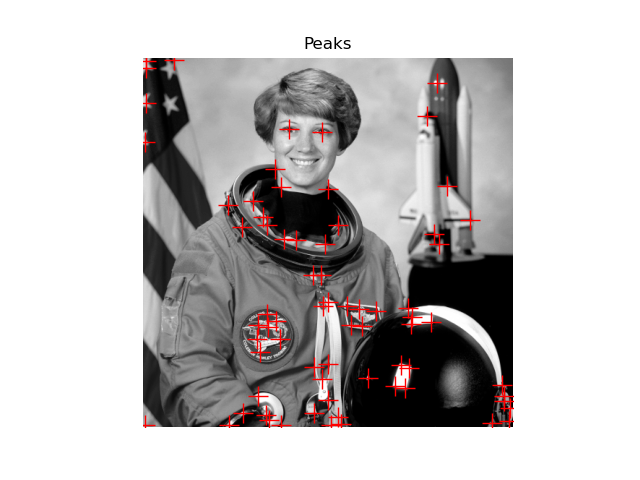

In [5]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

HCfilter = corner_harris(im_gray, k=0.01, sigma = 5)
Peaks = corner_peaks(HCfilter, min_distance=1, threshold_rel=0.06)

fig, ax = plt.subplots(1, 1)
ax.imshow(im_gray, cmap="gray")
ax.plot(Peaks[:,1], Peaks[:,0], '+r', markersize=15)
ax.set_title("Peaks")
ax.set_axis_off()

plt.show(fig)